In [ ]:
# data cleaning on EXCEL
# rid of the released section because the dates are identical to the year
# there were alot of issues for the budget and gross section of the movies. 
# removed blank rows



In [32]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
              
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configurations of the plots we will create

pd.options.mode.chained_assignment = None
              
# Read in the data

df = pd.read_csv(r'C:\Users\Ezra Kang\Desktop\Data Analytics\case_study\movies.csv')

In [37]:
# previewing data
df. head ()

,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,Following,R,Crime,1998,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
1,Primer,PG-13,Drama,2004,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77
2,El Mariachi,R,Action,1992,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81
3,Paranormal Activity,R,Horror,2007,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86
4,The Living End,Unrated,Comedy,1992,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81


In [34]:
# checking for missing data 

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [35]:
# data types for our columns

print(df.dtypes)

name        object
rating      object
genre       object
year         int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object


In [41]:
# getting rid of the .0 for these columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,Following,R,Crime,1998,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
1,Primer,PG-13,Drama,2004,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77
2,El Mariachi,R,Action,1992,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81
3,Paranormal Activity,R,Horror,2007,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86
4,The Living End,Unrated,Comedy,1992,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,Justice League,PG-13,Action,2017,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120
5426,Pirates of the Caribbean: at World's End,PG-13,Action,2007,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169
5427,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152
5428,Avengers: Infinity War,PG-13,Action,2018,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [83]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

df.head ()


,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,1464,6,5,1998,89000,319,517,813,46,6000,48482,1055,69
1,3069,5,6,2004,101000,1770,2772,1592,47,7000,545436,559,77
2,1259,6,0,1992,64000,1670,2604,237,30,7000,2040920,454,81
3,2913,6,9,2007,225000,1454,2295,978,47,15000,193355800,1285,86
4,4403,8,4,1992,2900,687,1095,1261,47,22769,692585,521,81


In [45]:
pd.set_option('display.max_rows', None)

In [82]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

df.head ()


,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,1464,6,5,1998,89000,319,517,813,46,6000,48482,1055,69
1,3069,5,6,2004,101000,1770,2772,1592,47,7000,545436,559,77
2,1259,6,0,1992,64000,1670,2604,237,30,7000,2040920,454,81
3,2913,6,9,2007,225000,1454,2295,978,47,15000,193355800,1285,86
4,4403,8,4,1992,2900,687,1095,1261,47,22769,692585,521,81


In [ ]:
# budget high correlation
# company high correlation

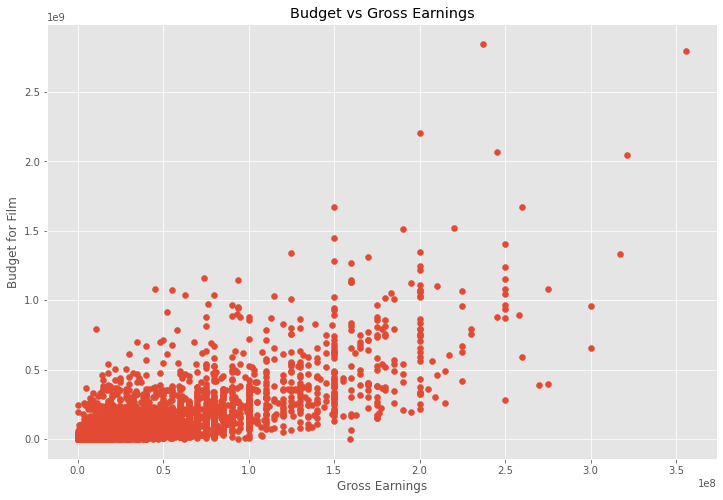

In [56]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

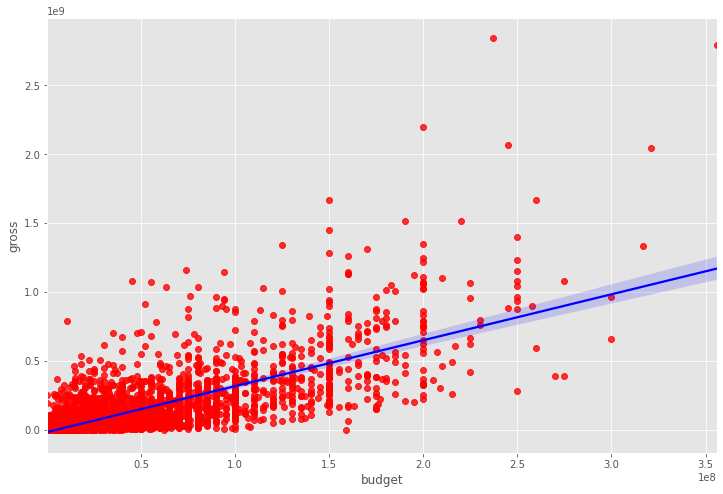

In [58]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [60]:
# looking at correlation, works on numerical fields
df.corr(method='pearson') #pearson, kendall, spearman

,year,votes,budget,gross,runtime
year,1.000000,0.205829,0.327859,0.274400,0.074618
votes,0.205829,1.000000,0.439856,0.614803,0.352290
budget,0.327859,0.439856,1.000000,0.740348,0.318399
gross,0.274400,0.614803,0.740348,1.000000,0.275434
runtime,0.074618,0.352290,0.318399,0.275434,1.000000


In [61]:
# high correlation between budget and gross
# seems to be correct

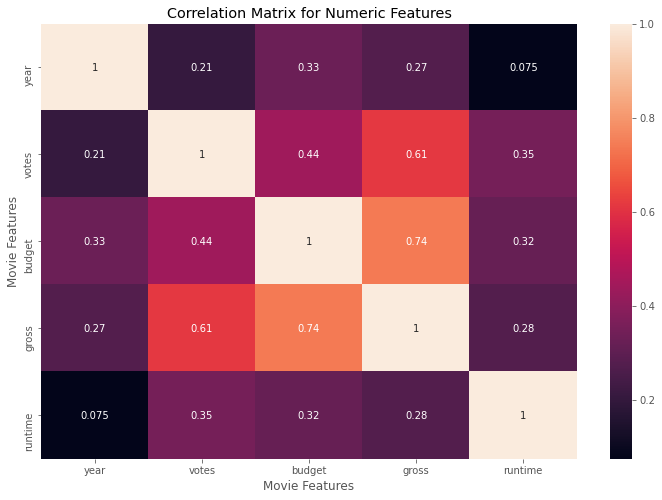

In [63]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [64]:
# looks at company
df.head()


,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,Following,R,Crime,1998,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
1,Primer,PG-13,Drama,2004,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77
2,El Mariachi,R,Action,1992,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81
3,Paranormal Activity,R,Horror,2007,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86
4,The Living End,Unrated,Comedy,1992,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81


In [84]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head ()

,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,1464,6,5,1998,89000,319,517,813,46,6000,48482,1055,69
1,3069,5,6,2004,101000,1770,2772,1592,47,7000,545436,559,77
2,1259,6,0,1992,64000,1670,2604,237,30,7000,2040920,454,81
3,2913,6,9,2007,225000,1454,2295,978,47,15000,193355800,1285,86
4,4403,8,4,1992,2900,687,1095,1261,47,22769,692585,521,81


In [85]:
df.head()


,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
0,1464,6,5,1998,89000,319,517,813,46,6000,48482,1055,69
1,3069,5,6,2004,101000,1770,2772,1592,47,7000,545436,559,77
2,1259,6,0,1992,64000,1670,2604,237,30,7000,2040920,454,81
3,2913,6,9,2007,225000,1454,2295,978,47,15000,193355800,1285,86
4,4403,8,4,1992,2900,687,1095,1261,47,22769,692585,521,81


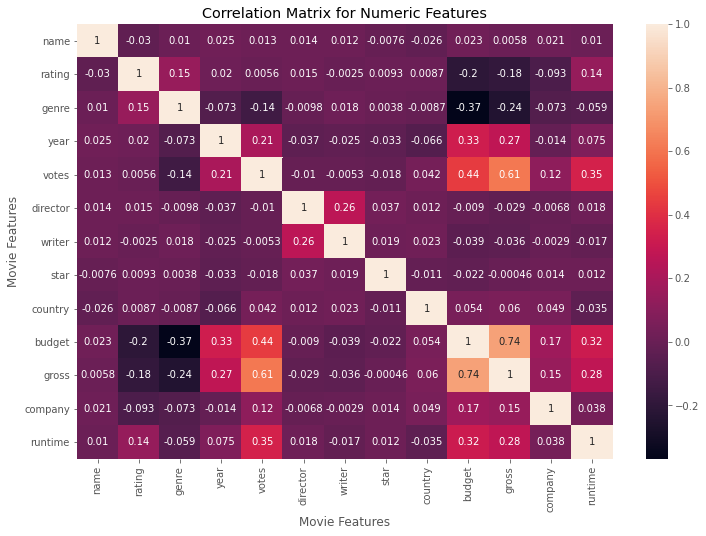

In [68]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [69]:
df_numerized.corr()

,name,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029600,0.010375,0.024855,0.012764,0.013837,0.011538,-0.007559,-0.025860,0.023498,0.005811,0.021061,0.010270
rating,-0.029600,1.000000,0.148864,0.020072,0.005618,0.014709,-0.002450,0.009273,0.008750,-0.203729,-0.181778,-0.092852,0.140632
genre,0.010375,0.148864,1.000000,-0.073289,-0.136219,-0.009774,0.017645,0.003833,-0.008718,-0.368585,-0.244234,-0.072678,-0.059332
year,0.024855,0.020072,-0.073289,1.000000,0.205829,-0.036903,-0.025172,-0.032861,-0.065661,0.327859,0.274400,-0.014200,0.074618
votes,0.012764,0.005618,-0.136219,0.205829,1.000000,-0.009965,-0.005293,-0.017622,0.041644,0.439856,0.614803,0.118866,0.352290
director,0.013837,0.014709,-0.009774,-0.036903,-0.009965,1.000000,0.262985,0.036882,0.011774,-0.009027,-0.029164,-0.006754,0.018367
writer,0.011538,-0.002450,0.017645,-0.025172,-0.005293,0.262985,1.000000,0.019234,0.022867,-0.039347,-0.035891,-0.002922,-0.016665
star,-0.007559,0.009273,0.003833,-0.032861,-0.017622,0.036882,0.019234,1.000000,-0.011163,-0.022027,-0.000460,0.014188,0.011778
country,-0.025860,0.008750,-0.008718,-0.065661,0.041644,0.011774,0.022867,-0.011163,1.000000,0.053647,0.060490,0.048959,-0.035303
budget,0.023498,-0.203729,-0.368585,0.327859,0.439856,-0.009027,-0.039347,-0.022027,0.053647,1.000000,0.740348,0.170791,0.318399


In [70]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029600
          genre       0.010375
          year        0.024855
          votes       0.012764
          director    0.013837
          writer      0.011538
          star       -0.007559
          country    -0.025860
          budget      0.023498
          gross       0.005811
          company     0.021061
          runtime     0.010270
rating    name       -0.029600
          rating      1.000000
          genre       0.148864
          year        0.020072
          votes       0.005618
          director    0.014709
          writer     -0.002450
          star        0.009273
          country     0.008750
          budget     -0.203729
          gross      -0.181778
          company    -0.092852
          runtime     0.140632
genre     name        0.010375
          rating      0.148864
          genre       1.000000
          year       -0.073289
          votes      -0.136219
          director   -0.009774
        

In [71]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368585
genre     budget     -0.368585
gross     genre      -0.244234
genre     gross      -0.244234
budget    rating     -0.203729
rating    budget     -0.203729
gross     rating     -0.181778
rating    gross      -0.181778
genre     votes      -0.136219
votes     genre      -0.136219
company   rating     -0.092852
rating    company    -0.092852
year      genre      -0.073289
genre     year       -0.073289
          company    -0.072678
company   genre      -0.072678
year      country    -0.065661
country   year       -0.065661
genre     runtime    -0.059332
runtime   genre      -0.059332
writer    budget     -0.039347
budget    writer     -0.039347
year      director   -0.036903
director  year       -0.036903
writer    gross      -0.035891
gross     writer     -0.035891
runtime   country    -0.035303
country   runtime    -0.035303
star      year       -0.032861
year      star       -0.032861
name      rating     -0.029600
rating    name       -0.029600
gross   

In [72]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross     votes       0.614803
votes     gross       0.614803
gross     budget      0.740348
budget    gross       0.740348
name      name        1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# company has low correlation
